# import, preparation

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
%config Completer.use_jedi = False

In [4]:
!ls
!echo ----
!cd ..
!pwd

Untitled.ipynb	 Untitled4.ipynb	     data36_popup.ipynb
Untitled1.ipynb  best_bet.ipynb		     data36_popup_analysis.ipynb
Untitled2.ipynb  cohort_data36.ipynb	     super_table.csv
Untitled3.ipynb  coinbase_api_example.ipynb  yahoo_finance.ipynb
----
/home/slackroo/JDS/data_practice/API_practice


# 1. opening files

In [5]:
#assign every pageview in a log
pageviews = pd.read_csv('/home/slackroo/JDS/data_practice/pageviews.tsv', sep='\t',
            names = ['date', 'time', 'country', 'user_id', 'event', 'source', 'page', 'width', 'hight'])

In [4]:
pageviews.head(5)

,date,time,country,user_id,event,source,page,width,hight
0,2021-02-01,00:00:19.679,MY,u8515925,b'pageview_blog,NaN,https://data36.com/pandas-tutorial-1-basics-re...,1536,864
1,2021-02-01,00:00:31.810,US,u8544901,b'pageview_blog,https://www.google.com,https://data36.com/python-nested-loops-if-stat...,1440,900
2,2021-02-01,00:00:57.138,NaN,u8535534,b'pageview_blog,https://www.google.com,https://data36.com/funnel-analysis/,375,812
3,2021-02-01,00:01:30.771,MY,u8594125,b'pageview_blog,https://www.google.com/,https://data36.com/how-to-import-data-into-sql...,1920,1080
4,2021-02-01,00:02:31.284,NaN,u8564427,b'pageview_blog,https://www.google.com/,https://data36.com/statistical-bias-types-expl...,1440,900


In [6]:
#assign every newsletter subscription in a log
newsletters = pd.read_csv('/home/slackroo/JDS/data_practice/newsletter.tsv', sep='\t',
            names = ['date', 'time', 'country', 'user_id', 'event', 'button', 'page', 'width', 'hight'])

In [7]:
#assign every click on the JDS site in a log
jds = pd.read_csv('/home/slackroo/JDS/data_practice/jds_site_click.tsv', sep='\t',
            names = ['date', 'time', 'country', 'user_id1', 'event', 'button', 'page', 'width', 'hight'])

# 2. data discovery

### toplist of visited pages

In [14]:
pageview_count = pageviews.groupby("page").count().sort_values(by = 'date', ascending = False)
pageview_count.head()[['date']]

,date
page,
https://data36.com/python-nested-loops-if-statements-combined-data-sciene/,23634
https://data36.com/plot-histogram-python-pandas/,22262
https://data36.com/sql-interview-questions-tech-screening-data-analysts/,19844
https://data36.com/pandas-tutorial-2-aggregation-and-grouping/,18238
https://data36.com/how-to-import-data-into-sql-tables/,14367


In [8]:
#saving top pages into a Python list for later
#top_pages = list(pageview_count.head(20).index)

### toplist: on which pages do people subscribe

##### Newsletter subscriptions gives interested users

In [10]:
newsletters.groupby('page').count()[['date']].sort_values(by='date',ascending = False).head(10)

,date
page,
https://data36.com/how-to-become-a-data-scientist/,676
https://data36.com/sql-interview-questions-tech-screening-data-analysts/,543
https://data36.com/inner-circle-data36-newsletter-free-data-science-resources/,499
https://data36.com/learn-sql-for-data-analysis-from-scratch/,43
https://data36.com/learn-python-for-data-science-from-scratch/,41
https://data36.com/sql-for-data-analysis-tutorial-beginners/,35
https://data36.com/python-for-data-science-python-basics-1/,32
https://data36.com/how-to-import-data-into-sql-tables/,27
https://data36.com/python-built-in-functions-methods-python-data-science-basics-3/,26


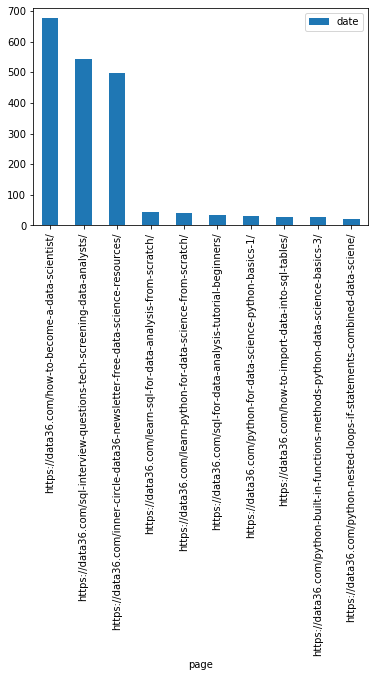

In [9]:
#same thing on a bar chart
newsletters.groupby('page').count()[['date']].sort_values(by='date', ascending = False).head(10).plot.bar()


## Finding where people come in for the main course selling pages

In [11]:
jds_sources = pageviews[pageviews.page == 'https://data36.com/the-junior-data-scientists-first-month-online-course/']
sql_sources = pageviews[pageviews.page == 'https://data36.com/sql-for-aspiring-data-scientists-7-day-online-course/']
htb_sources = pageviews[pageviews.page == 'https://data36.com/how-to-become-a-data-scientist/']

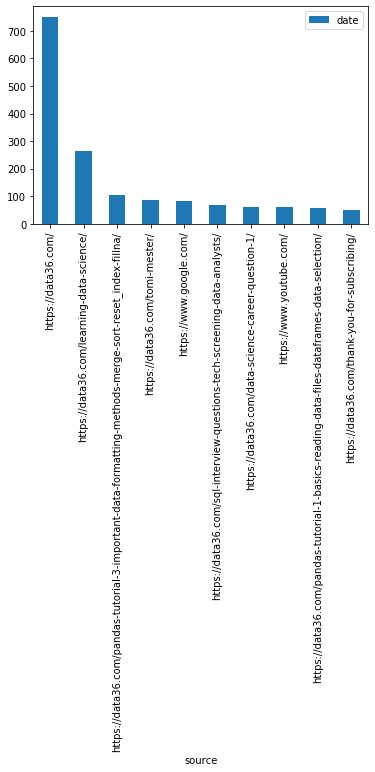

In [12]:
jds_sources.groupby('source').count()[['date']].sort_values(by='date', ascending = False).head(10).plot.bar()

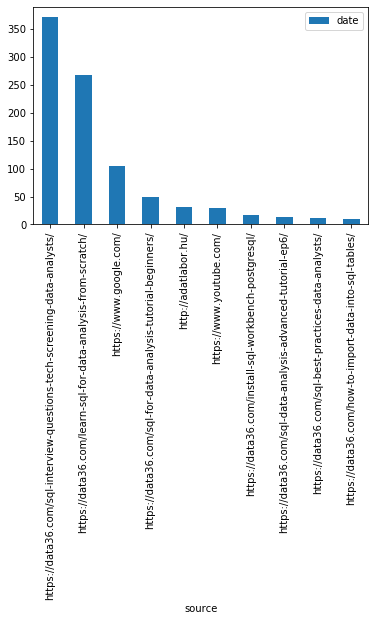

In [12]:
sql_sources.groupby('source').count()[['date']].sort_values(by='date', ascending = False).head(10).plot.bar()

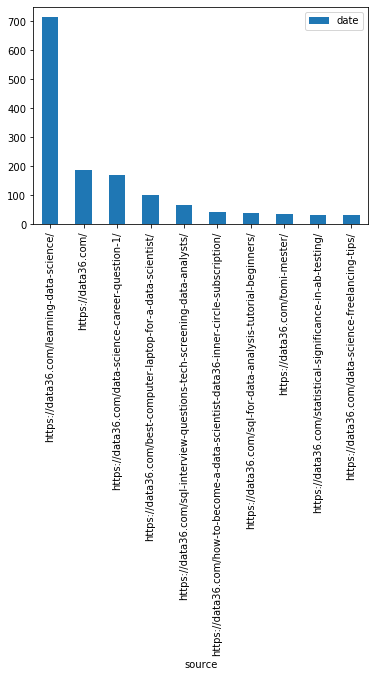

In [13]:
htb_sources.groupby('source').count()[['date']].sort_values(by='date', ascending = False).head(10).plot.bar()

### error! click through rate in most read articles

In [13]:
page = 'https://data36.com/learning-data-science/'
print(pageviews[pageviews.page == page].count().date)
newsletters[newsletters.page == page].date.count()

5956


3

In [14]:
pages = ['https://data36.com/learning-data-science/',
        'https://data36.com/become-data-scientist-7-plus-1-selfish-reasons/',
        'https://data36.com/data-science-career-question-1/',
        'https://data36.com/presentation-tips-for-data-professionals/']

for i in pages:
    page = i
    print((pageviews[pageviews.page == page].count().date), newsletters[newsletters.page == page].date.count())

5956 3
544 0
2090 1
727 0


#### conclusion: the conversion rate of the popup is terrible!

# 3. DEFINING CONVERSION EVENTS

### how to become a DS micro conversion

In [15]:
howto_visited = pageviews[pageviews.page == 'https://data36.com/how-to-become-a-data-scientist/']
howto_visited = howto_visited.drop_duplicates('user_id', keep='last').groupby('source').count()
howto_visited = howto_visited[howto_visited.date > 5]
howto_visited = howto_visited.reset_index()[['source','date']]

### how to become a DS macro conversion

In [16]:
howto_converted = newsletters[newsletters.page == 'https://data36.com/how-to-become-a-data-scientist/'][[
    'user_id', 'date', 'time']]
howto_converted = howto_converted.drop_duplicates('user_id')

In [17]:
howto_converted

,user_id,date,time
0,u8446607,2021-02-01,02:35:44.972
12,u8528818,2021-02-01,12:29:09.329
13,u8440763,2021-02-01,12:56:49.099
18,u8572725,2021-02-01,14:23:07.309
23,u8430160,2021-02-01,20:50:30.942
...,...,...,...
2133,u8554835,2021-04-29,14:26:12.328
2138,u8603988,2021-04-29,16:23:22.549
2142,u8601163,2021-04-30,08:51:38.771
2150,u8496510,2021-04-30,15:31:07.538


### JDS micro conversion

In [18]:
jds_visited = pageviews[pageviews.page == 'https://data36.com/the-junior-data-scientists-first-month-online-course/']
jds_visited = jds_visited.drop_duplicates('user_id', keep='last').groupby('source').count()
jds_visited = jds_visited[jds_visited.date > 5]
jds_visited = jds_visited.reset_index()[['source','date']]

### JDS macro conversion

In [19]:
jds_converted = jds[jds.button == "Subscribe!"][['user_id1', 'date', 'time']].drop_duplicates('user_id1')

# JDS vs HOWTO converted people

### is there an overlap? how big?

In [20]:
howto_converted.count()

user_id    411
date       411
time       411
dtype: int64

In [21]:
jds_converted.count()

user_id1    216
date        216
time        216
dtype: int64

### how many people joined both JDS and how to 

In [22]:
jds_converted.merge(howto_converted, left_on = 'user_id1', right_on = 'user_id', how = 'inner').count()

user_id1    42
date_x      42
time_x      42
user_id     42
date_y      42
time_y      42
dtype: int64

#### hypothesis #1 is disproven!!!

# 4. CREATING A "SUPER TABLE" WITH: VISITS, MICRO- & MACRO-CONVERSIONS

### this is the tricky part -- creating last click attribution

In [23]:
#merging the visited pages to the macro conversion event
howto_converted_source = howto_converted.merge(pageviews, left_on = 'user_id', right_on = 'user_id', how = 'inner')

In [24]:
#filtering for only those events that happened BEFORE the actual conversion
howto_converted_source = howto_converted_source[
    (howto_converted_source.time_x > howto_converted_source.time_y) & (
        howto_converted_source.date_x == howto_converted_source.date_y)]

In [25]:
#filtering for the LAST event before the conversion, remove duplicates, group, count, etc.
howto_converted_source = howto_converted_source[
    howto_converted_source.page == 'https://data36.com/how-to-become-a-data-scientist/'
                  ].drop_duplicates('user_id', keep='last').groupby('source').count()[['date_x']].sort_values(
    by='date_x', ascending = False)

In [26]:
#formatting
howto_converted_source = howto_converted_source.reset_index()

In [27]:
###this is the list of the last articles people visited before coming
###to the https://data36.com/how-to-become-a-data-scientist/ and actually subscribe.

howto_converted_source.head(3)

,source,date_x
0,https://data36.com/learning-data-science/,151
1,https://data36.com/data-science-career-questio...,39
2,https://data36.com/,27


# What converts JDS people

### this is the tricky part -- creating last click attribution

In [28]:
#merging the visited pages to the macro conversion event
jds_converted_source = jds_converted.merge(pageviews, left_on = 'user_id1', right_on = 'user_id', how = 'inner')

In [29]:
#filtering for only those events that happened BEFORE the actual conversion
jds_converted_source = jds_converted_source[
    (jds_converted_source.time_x > jds_converted_source.time_y) & (
        jds_converted_source.date_x == jds_converted_source.date_y)]

In [30]:
#filtering for the LAST event before the conversion, remove duplicates, group, count, etc.
jds_converted_source = jds_converted_source[jds_converted_source.page == 'https://data36.com/the-junior-data-scientists-first-month-online-course/'
                  ].drop_duplicates('user_id1', keep='last').groupby('source').count()[['date_x']].sort_values(
    by='date_x', ascending = False)

In [31]:
#formatting
jds_converted_source = jds_converted_source.reset_index() #source

In [32]:
###this is the list of the last articles people visited before coming
###to the https://data36.com/how-to-become-a-data-scientist/ and actually subscribe.
jds_converted_source

,source,date_x
0,https://data36.com/,39
1,https://data36.com/learning-data-science/,26
2,https://data36.com/how-to-become-a-data-scient...,11
3,https://data36.com/sql-interview-questions-tec...,7
4,https://data36.com/data-science-career-questio...,7
5,https://data36.com/plot-histogram-python-pandas/,4
6,https://tomimester.medium.com/how-to-break-int...,4
7,https://data36.com/tomi-mester/,4
8,https://data36.com/thank-you-for-subscribing/,4
9,https://data36.com/sql-data-analysis-advanced-...,4


### CREATING THE SUPER TABLE

In [33]:
howto_visited.head(3)

,source,date
0,https://data36.com/,147
1,https://data36.com/become-data-scientist-7-plu...,7
2,https://data36.com/best-computer-laptop-for-a-...,73


In [34]:
howto_converted_source.head(3)

,source,date_x
0,https://data36.com/learning-data-science/,151
1,https://data36.com/data-science-career-questio...,39
2,https://data36.com/,27


In [35]:
jds_visited.head(3)

,source,date
0,http://m.facebook.com/,11
1,https://data36.com/,516
2,https://data36.com/beautiful-soup-tutorial-web...,7


In [36]:
jds_converted_source.head(3)

,source,date_x
0,https://data36.com/,39
1,https://data36.com/learning-data-science/,26
2,https://data36.com/how-to-become-a-data-scient...,11


In [37]:
#formatting the pageviews dataset, then counting the number of pageviews for each article
numb_of_pageviews = pageviews.drop_duplicates(subset=['user_id', 'page']).groupby('page').count()

#removing articles with less than 300 views -- and some formatting
numb_of_pageviews = numb_of_pageviews[numb_of_pageviews.date > 300].reset_index()[['page','date']] #page

In [38]:
######################
# MERGING EVERYTHING #
######################

super_table = numb_of_pageviews.merge(
    howto_visited, how='left', left_on = 'page', right_on = 'source').merge(
    howto_converted_source, how='left', left_on = 'page', right_on = 'source').merge(
    jds_visited, how='left', left_on = 'page', right_on = 'source').merge(
    jds_converted_source, how='left', left_on = 'page', right_on = 'source')

super_table = super_table[['page', 'date_x_x', 'date_y', 'date_x_y', 'date', 'date_x']]
super_table.columns = ['page', 'article_reads', 'howto_visited', 'howto_conv', 'jds_visited','jds_conv']

super_table = super_table.fillna(0)

In [39]:
super_table.sort_values(by = 'article_reads', ascending = False).to_csv('super_table.csv')

In [40]:
super_table.sort_values(by = 'howto_conv', ascending = False).head(10)

,page,article_reads,howto_visited,howto_conv,jds_visited,jds_conv
33,https://data36.com/learning-data-science/,4384,521.0,151.0,175.0,26.0
10,https://data36.com/data-science-career-questio...,1628,130.0,39.0,47.0,7.0
0,https://data36.com/,4916,147.0,27.0,516.0,39.0
2,https://data36.com/best-computer-laptop-for-a-...,8878,73.0,13.0,28.0,2.0
59,https://data36.com/sql-interview-questions-tec...,14389,53.0,12.0,58.0,7.0
32,https://data36.com/learn-sql-for-data-analysis...,1363,21.0,7.0,15.0,0.0
14,https://data36.com/data-scientists-day/,330,13.0,6.0,6.0,0.0
70,https://data36.com/tomi-mester/,435,31.0,6.0,49.0,4.0
65,https://data36.com/statistical-significance-in...,2350,23.0,5.0,9.0,1.0
49,https://data36.com/python-nested-loops-if-stat...,20802,6.0,4.0,17.0,1.0


In [41]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

super_table.sort_values(by = 'jds_conv', ascending = False).reset_index(drop= True)

,page,article_reads,howto_visited,howto_conv,jds_visited,jds_conv
0,https://data36.com/,4916,147.0,27.0,516.0,39.0
1,https://data36.com/learning-data-science/,4384,521.0,151.0,175.0,26.0
2,https://data36.com/how-to-become-a-data-scientist-data36-inner-circle-subscription/,417,25.0,0.0,24.0,11.0
3,https://data36.com/data-science-career-question-1/,1628,130.0,39.0,47.0,7.0
4,https://data36.com/sql-interview-questions-tech-screening-data-analysts/,14389,53.0,12.0,58.0,7.0
5,https://data36.com/plot-histogram-python-pandas/,18761,15.0,4.0,21.0,4.0
6,https://data36.com/sql-data-analysis-advanced-tutorial-ep6/,529,0.0,3.0,12.0,4.0
7,https://data36.com/tomi-mester/,435,31.0,6.0,49.0,4.0
8,https://data36.com/thank-you-for-subscribing/,749,20.0,2.0,32.0,4.0
9,https://data36.com/python-libraries-packages-data-scientists/,2914,14.0,3.0,13.0,2.0


# 5. What people do before they subscribe to JDS

In [44]:
#let's see hypothesis #2!

### how many articles people read before they subscribe to JDS

In [42]:
#jds conversions
jds_converted_before = jds[jds.button == "Subscribe!"][['user_id1', 'date', 'time']].drop_duplicates('user_id1')

In [43]:
#merging the visited pages to the macro conversion event
jds_converted_before = jds_converted_before.merge(
    pageviews, left_on = 'user_id1', right_on = 'user_id', how = 'inner')

In [44]:
#filtering for only those events that happened BEFORE the actual conversion
jds_converted_before = jds_converted_before[(
    jds_converted_before.time_x > jds_converted_before.time_y) & (
        jds_converted_before.date_x >= jds_converted_before.date_y)]

In [45]:
#formatting, counting, then counting again (How many articles people read before convert)
jds_converted_before.reset_index().groupby('user_id1').count().groupby('index').date_x.count().head(3)

index
1    40
2    68
3    24
Name: date_x, dtype: int64

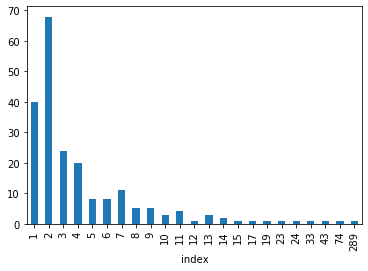

In [46]:
jds_converted_before.reset_index().groupby('user_id1').count().groupby('index').date_x.count().plot.bar()

# 6. What people do before they subscribe to JDS -- for specific articles

https://data36.com/learning-data-science/


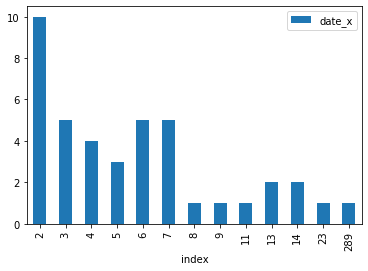

In [47]:
spec_article = 'https://data36.com/learning-data-science/'

converted_read_spec_art = jds_converted_before[jds_converted_before.page == spec_article][['user_id1']].drop_duplicates()
print(spec_article)

converted_read_spec_art.merge(
    jds_converted_before, how = 'inner').reset_index(
    ).groupby('user_id1').count().groupby('index').count()[['date_x']].plot.bar()

https://data36.com/data-science-career-question-1/


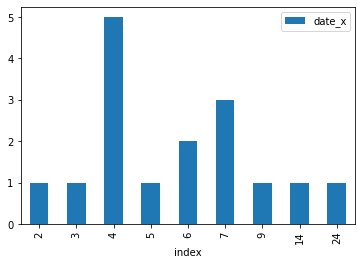

In [48]:
spec_article = 'https://data36.com/data-science-career-question-1/'

converted_read_spec_art = jds_converted_before[jds_converted_before.page == spec_article][['user_id1']].drop_duplicates()
print(spec_article)

converted_read_spec_art.merge(
    jds_converted_before, how = 'inner').reset_index(
    ).groupby('user_id1').count().groupby('index').count()[['date_x']].plot.bar()

https://data36.com/


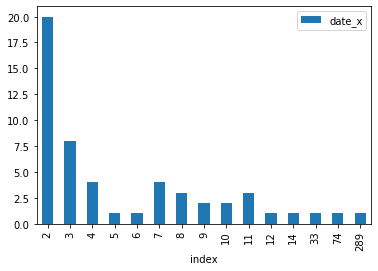

In [49]:
spec_article = 'https://data36.com/'

converted_read_spec_art = jds_converted_before[jds_converted_before.page == spec_article][['user_id1']].drop_duplicates()
print(spec_article)

converted_read_spec_art.merge(
    jds_converted_before, how = 'inner').reset_index(
    ).groupby('user_id1').count().groupby('index').count()[['date_x']].plot.bar()